# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import utils
from sklearn import metrics as me

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [23]:
model = Sequential()

# first model
model.add(Dense(16, input_shape=(784,), activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

c:\Users\ursbe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [20]:
batch_size = 128
n_epoch = 50

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001, momentum=0.1), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8046 - loss: 0.7971 - val_accuracy: 0.9272 - val_loss: 0.2540
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9197 - loss: 0.2816 - val_accuracy: 0.9437 - val_loss: 0.1984
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9343 - loss: 0.2259 - val_accuracy: 0.9582 - val_loss: 0.1584
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9440 - loss: 0.1910 - val_accuracy: 0.9615 - val_loss: 0.1390
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9566 - loss: 0.1489 - val_accuracy: 0.9685 - val_loss: 0.1160
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9619 - loss: 0.1305 - val_accuracy: 0.9720 - val_loss: 0.1070
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9690 - loss: 0.1086 - val_accuracy: 0.9722 - val_loss: 0.0993
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0951 - val_accuracy: 0.

Show the performance of the model

Test score: 0.06881905347108841
Test accuracy: 0.9811999797821045


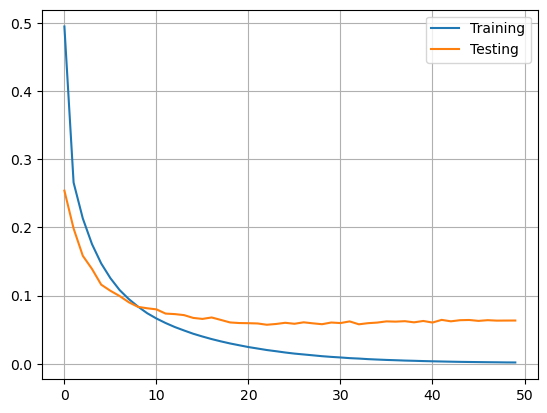

In [21]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
F1 macro Score: 0.9809796904590385
F1 weighted Score: 0.9811910297485315
F1 micro Score: 0.9812


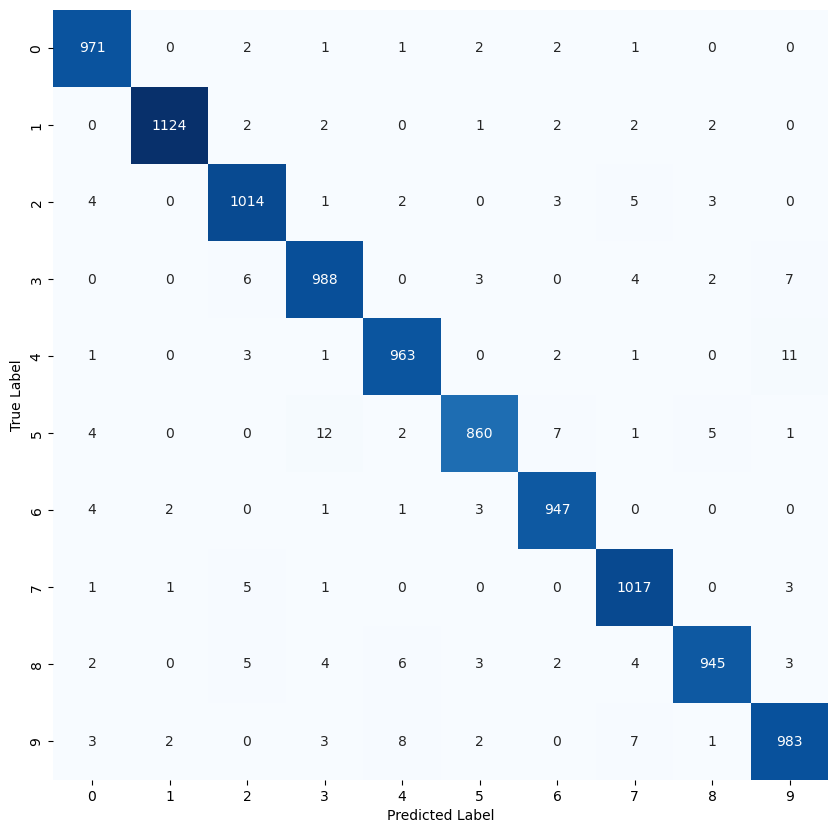

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

# plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# F1 scores
f1_score_macro = f1_score(y_test, pred, average='macro')
f1_score_micro = f1_score(y_test, pred, average='micro')
f1_score_weighted = f1_score(y_test, pred, average='weighted')

print(f"F1 macro Score: {f1_score_macro}")
print(f"F1 weighted Score: {f1_score_weighted}")
print(f"F1 micro Score: {f1_score_micro}")
